In [24]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#### dataset path

In [25]:
file_path="/home/age/KAIM-Projects/data/benin-malanville.csv"

In [26]:
df = pd.read_csv(file_path)


In [27]:
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [29]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [30]:
null_counts =df.isnull().sum()
null_counts

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [31]:
high_null = null_counts[null_counts/len(df) > 0.05]
high_null

Comments    525600
dtype: int64

In [32]:
df['GHI']=df['GHI'].apply(lambda x: x if x>0 else 0)
df['DNI']=df['DNI'].apply(lambda x: x if x>0 else 0)
df['DHI']=df['DHI'].apply(lambda x: x if x>0 else 0)

In [33]:
check_outlier =['GHI','DNI','DHI','ModA','ModB','Tamb','RH','WS','WSgust']
z_scores= df[check_outlier].apply(zscore)
outlier_flags = (z_scores.abs()>3).any(axis=1)

outlier_flags

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

In [34]:
outlier_flags

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

In [35]:
df.shape

(525600, 19)

In [36]:
df_clean=df[~outlier_flags].reset_index(drop=True)

In [37]:
df_clean.shape

(517707, 19)

In [38]:
df_clean=df_clean.dropna( axis=1)

In [39]:
df_clean.to_csv('../data/benin_clean.csv', index=False)

#### Data visualization for Cleaned Data

In [40]:
benin = pd.read_csv('../data/benin_clean.csv',parse_dates=['Timestamp'])
benin.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [41]:
benin['Timestamp']= pd.to_datetime(benin['Timestamp'])


In [42]:
benin['Hour'] = benin['Timestamp'].dt.hour
benin['Day'] = benin['Timestamp'].dt.date
benin['Month'] = benin['Timestamp'].dt.month

In [43]:
daily_avg = benin.groupby('Hour')[['GHI', 'DNI', 'DHI','Tamb']].mean()

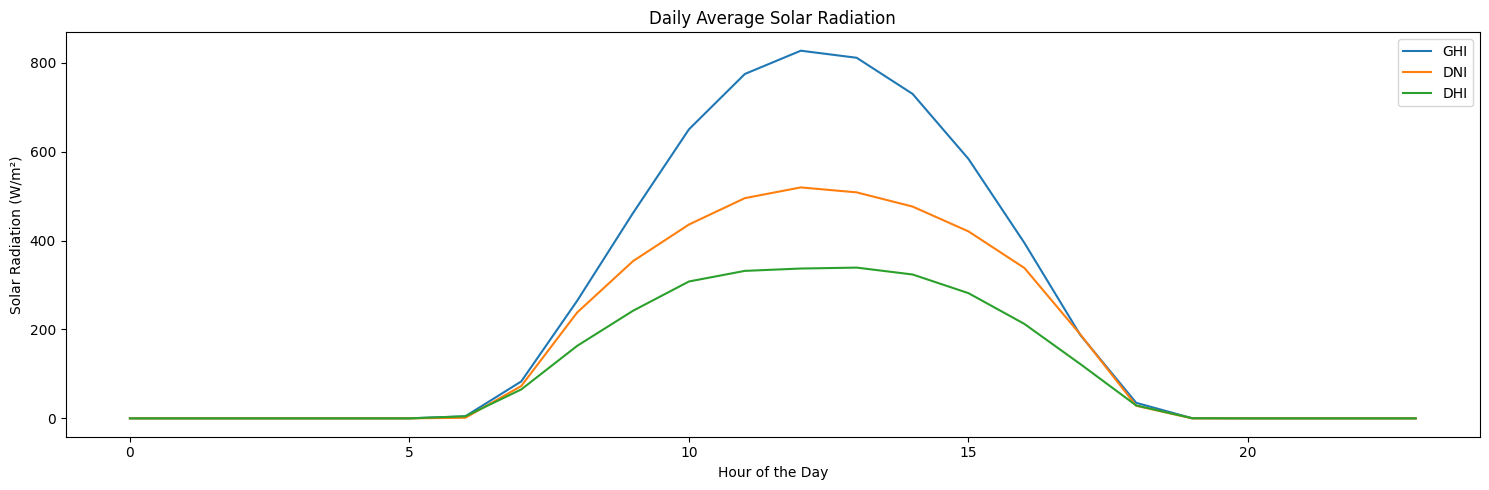

In [44]:
plt.figure(figsize=(15, 5))
for col in ['GHI', 'DNI', 'DHI']:
    plt.plot(daily_avg.index, daily_avg[col], label=col)
plt.title('Daily Average Solar Radiation')
plt.xlabel('Hour of the Day')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/benin_daily_avg_solar_radiation.png')
plt.show()

## Key Solar Radiation Patterns
###### Peak Sun Hours: The highest radiation occurs around midday (~12 PM–2 PM), typical for most locations.

###### GHI Curve: Follows a bell-shaped pattern, peaking at noon when the sun is highest.

##### DMI vs. DHI:

###### DMI is high when skies are clear (direct sunlight dominates).

###### DHI increases if there’s cloud cover or atmospheric scattering.

##### Sunrise/Sunset Effects:

###### Low GHI/DHI in early morning/late evening (sun is low).

###### DMI drops sharply near sunrise/sunset (direct sunlight angle becomes unfavorable).

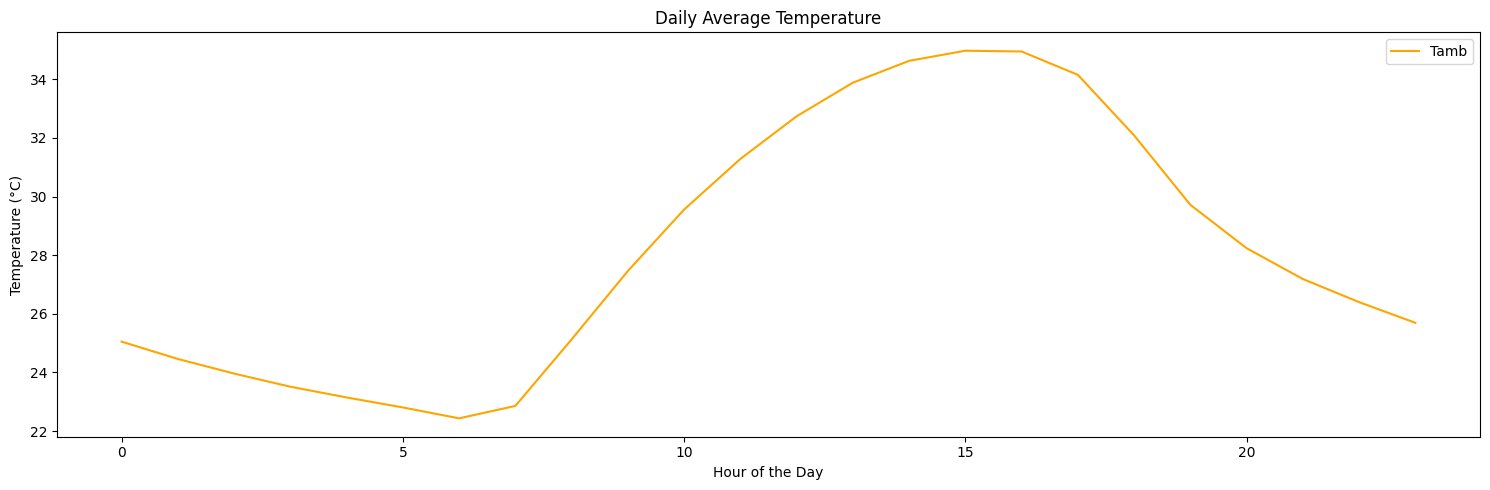

In [45]:
plt.figure(figsize=(15, 5))

plt.plot(daily_avg.index, daily_avg['Tamb'], label='Tamb', color='orange')
plt.title('Daily Average Temperature')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/benin_daily_avg_temperature.png')
plt.show()

###### Diurnal Cycle: The curve follows the expected daily temperature variation:

In [46]:
monthly_avg = benin.groupby('Month')[['GHI', 'DNI', 'DHI','Tamb']].mean()


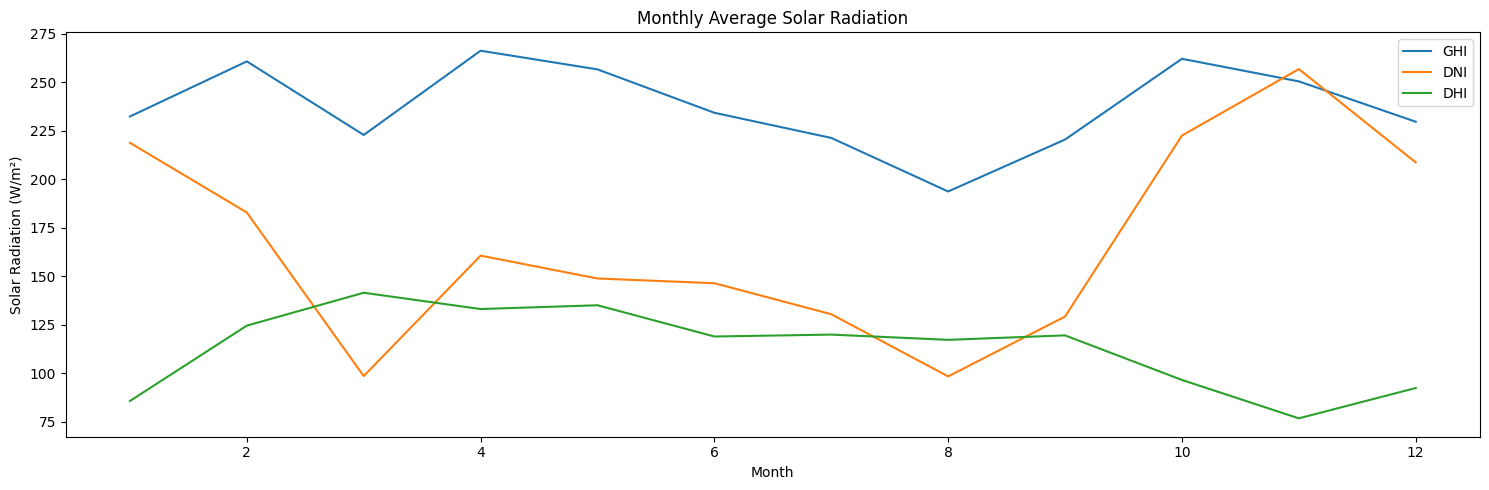

In [47]:
plt.figure(figsize=(15, 5))
# monthly_avg[['GHI', 'DNI', 'DHI']].plot(kind='bar')
for col in ['GHI', 'DNI', 'DHI']:
    plt.plot(monthly_avg.index, monthly_avg[col], label=col)
plt.title('Monthly Average Solar Radiation')
plt.xlabel('Month')
plt.ylabel('Solar Radiation (W/m²)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.savefig('../figures/benin_monthly_avg_solar_radiation.png')
plt.show()

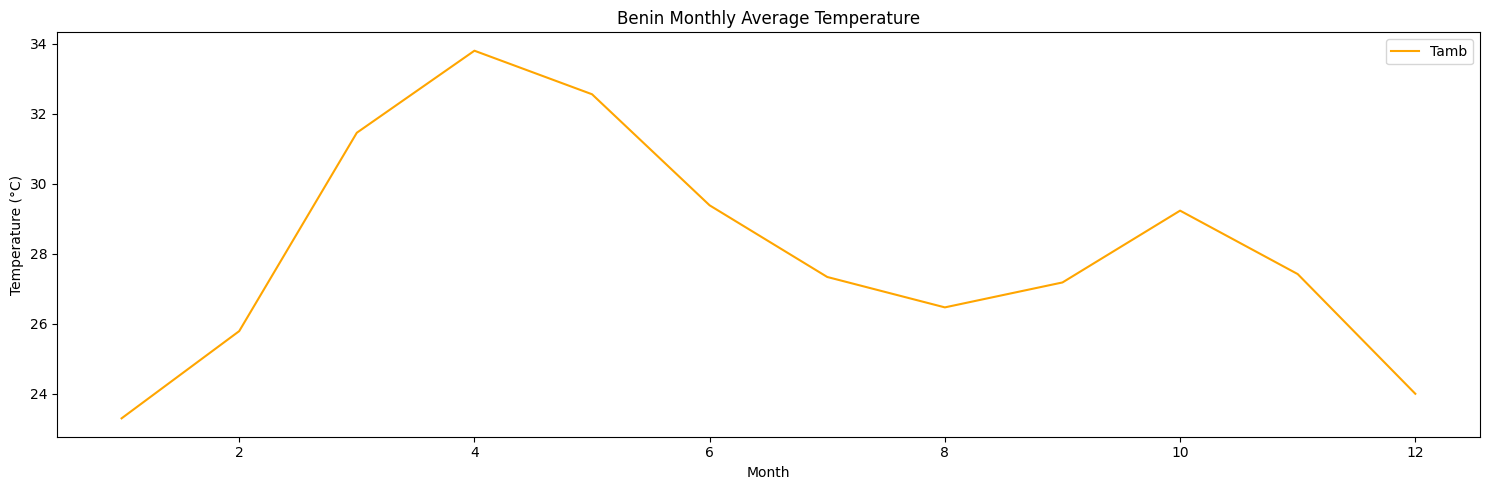

In [55]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_avg.index, monthly_avg['Tamb'], label='Tamb', color='orange')
plt.title('Benin Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.savefig('../figures/benin_monthly_avg_temperature.png')
plt.show()

###### cleaning Impact

In [49]:
module_avg= benin.groupby('Cleaning')[['ModA', 'ModB']].mean()

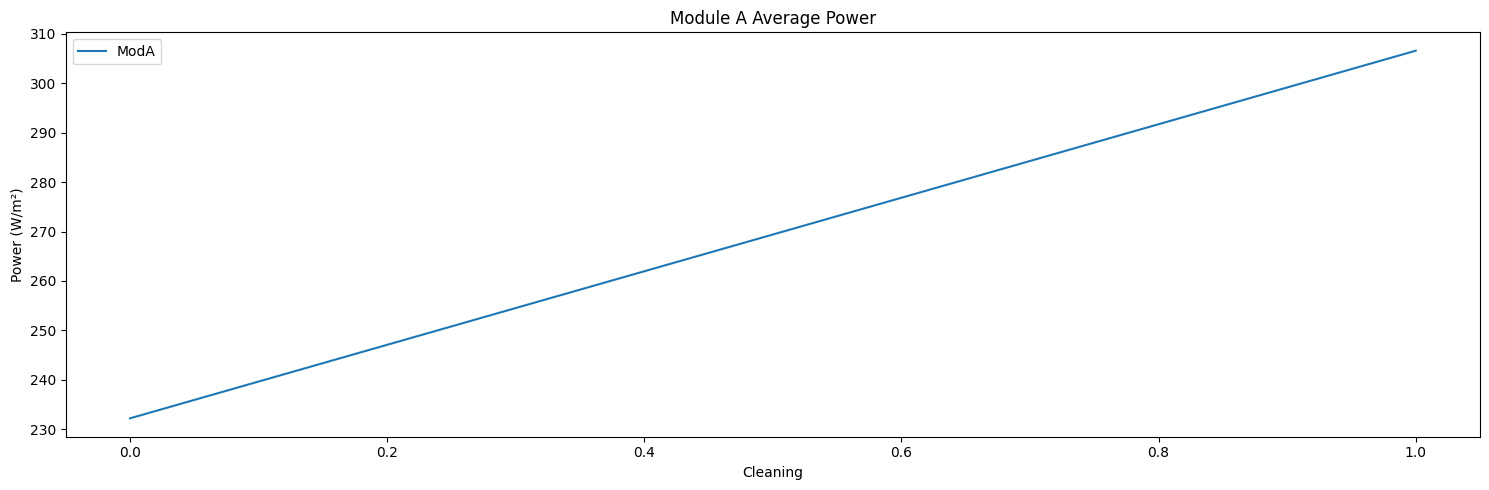

In [50]:
plt.figure(figsize=(15, 5))

plt.plot(module_avg.index, module_avg['ModA'], label='ModA')
plt.title('Module A Average Power')
plt.xlabel('Cleaning')
plt.ylabel('Power (W/m²)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.savefig('../figures/benin_module_a_avg_power.png')
plt.show()

In [51]:
corr_cols =['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

In [52]:
benin[corr_cols].corr()

,GHI,DNI,DHI,TModA,TModB
GHI,1.000000,0.891277,0.850489,0.919143,0.874201
DNI,0.891277,1.000000,0.565898,0.798510,0.762516
DHI,0.850489,0.565898,1.000000,0.825760,0.781357
TModA,0.919143,0.798510,0.825760,1.000000,0.983789
TModB,0.874201,0.762516,0.781357,0.983789,1.000000


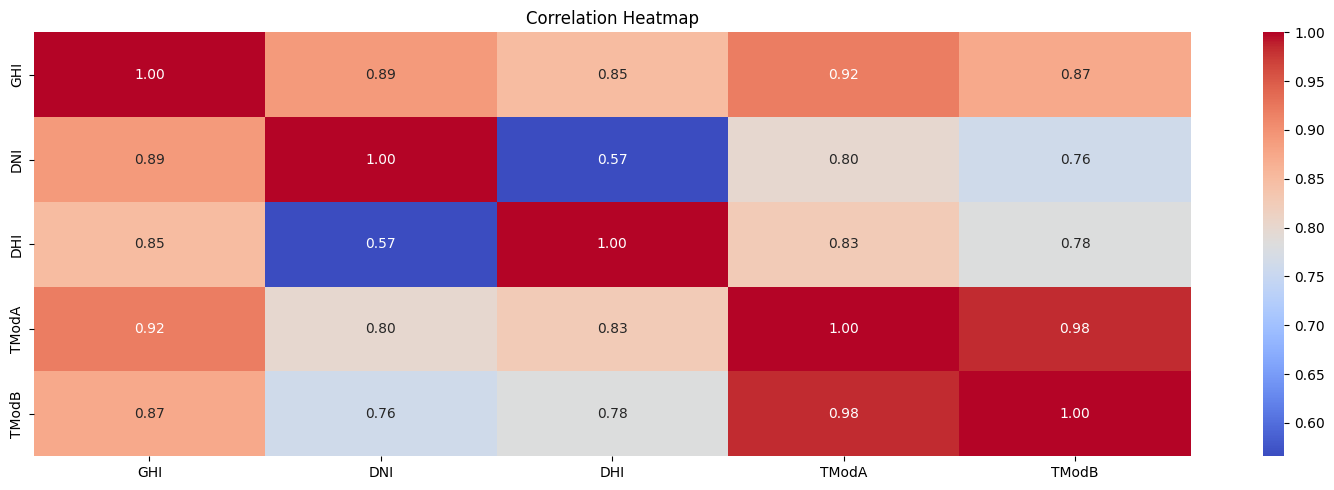

In [53]:
plt.figure(figsize=(15, 5))
sns.heatmap(benin[corr_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('../figures/benin_correlation_heatmap.png')
plt.show()

/tmp/ipykernel_20060/2543962262.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


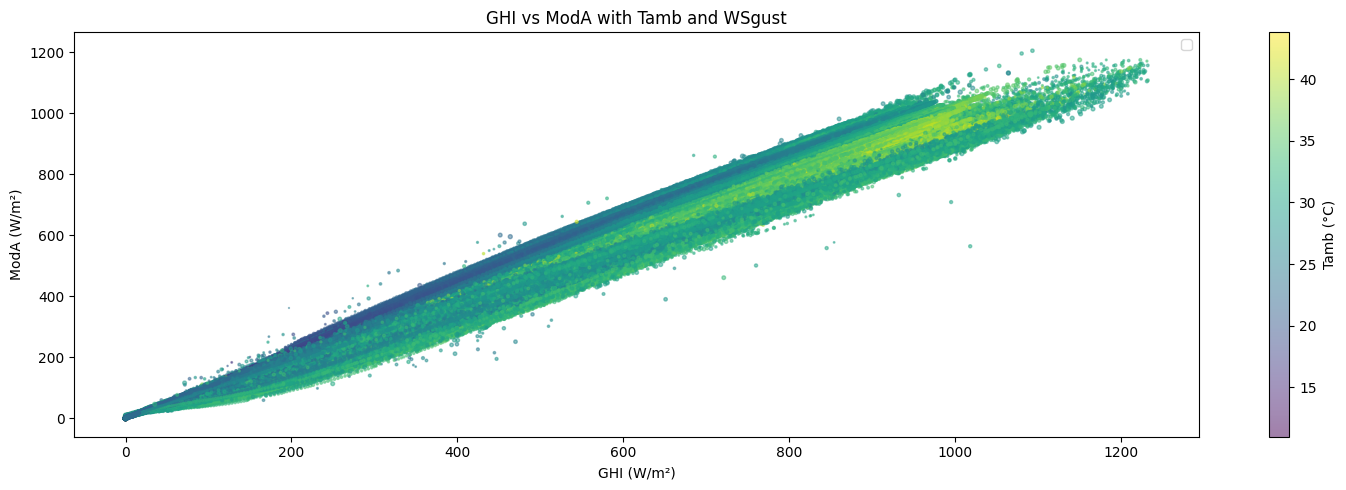

In [54]:
plt.figure(figsize=(15, 5))

plt.scatter(benin['GHI'], benin['ModA'],benin['WSgust'], alpha=0.5, c=benin['Tamb'], cmap='viridis')
plt.title('GHI vs ModA with Tamb and WSgust')
plt.xlabel('GHI (W/m²)')
plt.ylabel('ModA (W/m²)')
plt.colorbar(label='Tamb (°C)')
plt.tight_layout()
plt.legend()
plt.savefig('../figures/benin_ghi_vs_modA.png')
plt.show()

/tmp/ipykernel_20060/2991081592.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='RH', y='Tamb', data=benin, palette='viridis', alpha=0.5)
/tmp/ipykernel_20060/2991081592.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/age/KAIM-Projects/solar-challenge-week1/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


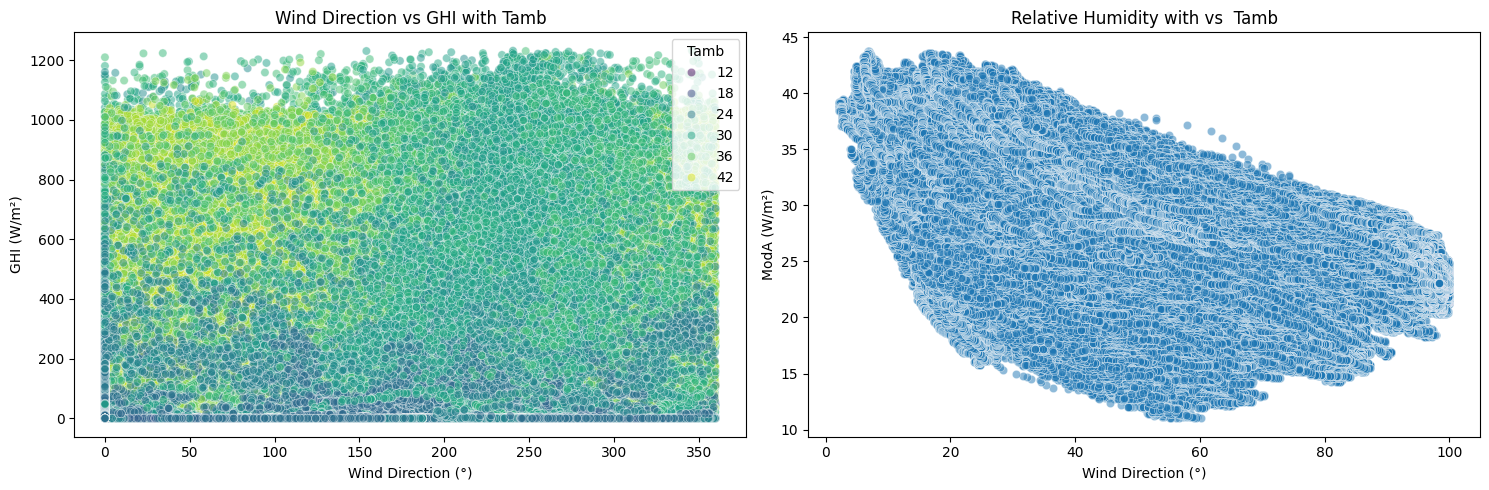

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='WD', y='GHI', data=benin, hue='Tamb', palette='viridis', alpha=0.5)
plt.title('Wind Direction vs GHI with Tamb')
plt.xlabel('Wind Direction (°)')
plt.ylabel('GHI (W/m²)')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='Tamb', data=benin, palette='viridis', alpha=0.5)
plt.title('Relative Humidity with vs  Tamb')
plt.xlabel('Wind Direction (°)')
plt.ylabel('ModA (W/m²)')
plt.tight_layout()
plt.show()